<a href="https://colab.research.google.com/github/yuvi2468/Minor-Project-ML-Image-Clasifiaction/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
from bing_image_downloader import downloader
downloader.download("roses",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://www.parfumflowercompany.com/wp-content/uploads/2015/10/Yves-Piaget-Premium-Scented-Garden-Rose-from-the-Meilland-Jardin-Parfum-collection-017.png
[%] File Downloaded !

[%] Downloading Image #2 from https://rmze.cc/wp-content/uploads/2019/10/13087-2.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.rocketfarms.com/images/flowers/rose-gallery/RF-Rose-Gallery-6.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://bestanimations.com/Holidays/Valentines/teddy/teddy-bear-holing-heart-greeting-gif-2.gif
[Error]Invalid image, not saving http://bestanimations.com/Holidays/Valentines/teddy/teddy-bear-holing-heart-greeting-gif-2.gif

[!] Issue getting: http://bestanimations.com/Holidays/Valentines/teddy/teddy-bear-holing-heart-greeting-gif-2.gif
[!] Error:: No active exception to reraise
[%] Downloading Image #4 from https://www.bing.com/th/id/OGC.0720b1530a20ef0cdb0becab

In [ ]:
downloader.download("tennis ball",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://images.solecollector.com/complex/image/upload/t_in_content_image/addict-lacoste-tennis-sneakers-03_o4o3mj.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.youthwork-practice.com/games/game-pictures/Summer-Olympic-Discipline-Ball-throwing.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.monroenews.com/storyimage/MI/20160505/NEWS/160509443/AR/0/AR-160509443.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/bFI6hGRa-hg/hqdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://vancouver.ca/images/cov/feature/pickleball-court-landing.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.slashgear.com/wp-content/uploads/2018/07/Bowser-Jr-Mario-Tennis.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://cms.qz.com/wp-content/uploads/2019/12/RTS2OSNV-e1576611720944.jpg?quality=75&amp;stri

In [ ]:
downloader.download("Flag",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from http://bestanimations.com/HomeOffice/paris-city-animated-gif-7.gif
[%] File Downloaded !

[%] Downloading Image #2 from https://www.bing.com/th/id/OGC.e9a9c37610599acfd5eabb78c4babcb8?pid=1.7&amp;rurl=http%3a%2f%2fbestanimations.com%2fHomeOffice%2fparis-city-animated-gif-7.gif&amp;ehk=SQmQg22e09kWAWZMaZhSeXfb%2bBWXmwLFNZOr%2bcyy5Tg%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.e9a9c37610599acfd5eabb78c4babcb8?pid=1.7&amp;rurl=http%3a%2f%2fbestanimations.com%2fHomeOffice%2fparis-city-animated-gif-7.gif&amp;ehk=SQmQg22e09kWAWZMaZhSeXfb%2bBWXmwLFNZOr%2bcyy5Tg%3d
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from https://yesofcorsa.com/wp-content/uploads/2017/10/4K-American-Flag-Wallpaper-For-IPhone.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.warrelics.eu/forum/attachments/flags-banners-pennants/1043446d1486039904t-signed-nazi-flag-up-60-question-1646863

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['roses','tennis ball','Flag']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability= True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://th.bing.com/th/id/Rd8be553315e1d9bd2b130507db830078?rik=vXgyebvRPtqdUw&riu=http%3a%2f%2fwww.pngpix.com%2fwp-content%2fuploads%2f2016%2f10%2fPNGPIX-COM-Tennis-Ball-PNG-Transparent-Image-1.png&ehk=V%2flnXdeAqZDDug51b1iRghyEaazky7QQj%2f2NjO5dwrQ%3d&risl=&pid=ImgRaw
(1378, 1378, 4)
 PREDICTED OUTPUT: tennis ball


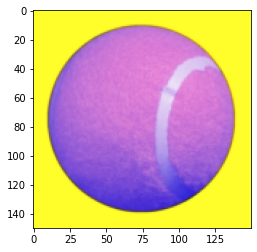

In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit

!pip install pyngrok==4.1.1
from pyngrok import ngrok

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle 
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['roses','tennis ball','Flag']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://cb8936a4dd1c.ngrok.io'